### For viewing results from SGD simulations and comparing against theory
2 May 23

In [28]:
# import os
# os.chdir('/Users/haozheshan/Dropbox/codes/gp_continual_learning/')
import numpy as np
import matplotlib.pyplot as plt
import cluster_utils

%load_ext autoreload
%autoreload 2   

# USE KEYWORDS BELOW TO SEARCH FOR FOLDERS
depth = '3'
sgd_result_list =cluster_utils.list_folders('cluster_results/', 'gradient', depth + 'L', 'permuted')
theory_result_list =cluster_utils.list_folders('cluster_results/', 'gp', 'permuted', 'output')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Generating a list at 2023-05-04 15:33
[0] gradient_20x500_mnist_permuted_3L_N1000_MINI1_eta1
[1] gradient_20x500_mnist_permuted_3L_N1000_MINI1_eta2
[2] gradient_20x500_mnist_permuted_3L_N1000_MINI1_eta0p5
Generating a list at 2023-05-04 15:33
[0] gp_20x500_mnist_permuted_1L_diff_lambda_outputs
[1] gp_20x500_mnist_permuted_3L_diff_lambda_outputs


In [29]:
sgd_ind = 2
theory_ind = 1
sgd_organizer = cluster_utils.ClusterResultOrganizer('cluster_results/',
                                                 batch_name=sgd_result_list[sgd_ind],
                                                 sort_by_key='depth')
all_sgd_test_loss = sgd_organizer.organize_results('test loss')[depth]
all_sgd_preds = sgd_organizer.organize_results('sampled outputs')[depth]


theory_organizer =\
    cluster_utils.ClusterResultOrganizer('cluster_results/',
                                         batch_name=theory_result_list[theory_ind],
                                         sort_by_key='lambda_val',
                                         order_by_seed_number=True)

all_theory_preds = theory_organizer.organize_results('sampled outputs')
all_theory_te_loss = theory_organizer.organize_results('test loss')

=================== Cluster organizer ===================
50 data objects loaded from folder "gradient_20x500_mnist_permuted_3L_N1000_MINI1_eta0p5".
For key <<depth>>, the values are [3]
=================== Cluster organizer ===================
=================== Cluster organizer ===================
150 data objects loaded from folder "gp_20x500_mnist_permuted_3L_diff_lambda_outputs".
For key <<lambda_val>>, the values are [18.9, 38566.0, 20433.0, 10.0, 72789.0, 452.0, 853.0, 2212.0, 4175.0, 1172.0, 621.0, 28072.0, 52983.0, 174.0, 329.0, 14873.0, 7880.0, 48.9, 92.4, 67.2, 35.6, 3039.0, 1610.0, 13.7, 25.9, 100000.0, 10826.0, 5736.0, 127.0, 239.0]
=================== Cluster organizer ===================


Text(0, 0.5, 'goodness-of-fit')

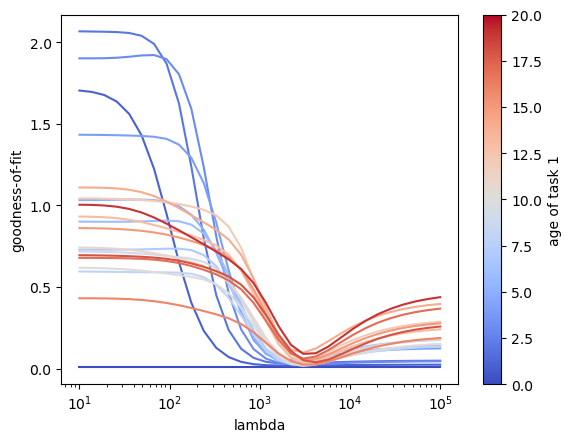

In [30]:
num_keys = len(all_theory_preds.keys())
fitness_scores = np.zeros((num_keys, 20))
loss_fitting_scores = np.zeros((num_keys, 20))
theory_keys = np.sort([float(item) for item in all_theory_preds.keys()])



for i in range(num_keys):
    for time_ind in range(20):
        
        theory_key = str(theory_keys[i])
        data1 = all_theory_preds[theory_key][0, time_ind].flatten()
        data2 = all_sgd_preds.mean(0)[time_ind].flatten()
        fitness_scores[i, time_ind] = np.linalg.norm(data1 - data2)**2 / (np.linalg.norm(data1) * np.linalg.norm(data2))
        loss1 = all_theory_te_loss[theory_key][0, 0, time_ind]
        loss2 = all_sgd_preds.mean(0)[0, time_ind]
        loss_fitting_scores[i, time_ind] = (loss1 - loss2)**2 / loss2


from matplotlib import cm, colors
cmap = cm.get_cmap("coolwarm")
norm = colors.Normalize(0, 20)
plt.figure()
for time_ind in range(20):
    plt.plot(theory_keys, fitness_scores[:, time_ind], label='fitness', color=cmap(float(time_ind / 20)))
plt.xlabel('lambda')
plt.xscale('log')
plt.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), label='age of task 1')
plt.ylabel('goodness-of-fit')

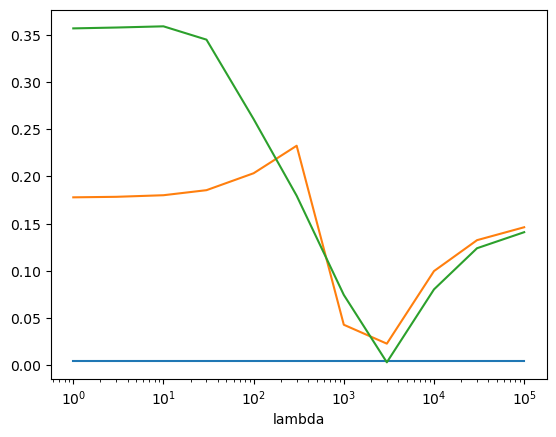

Text(0, 0.5, 'fitting error')

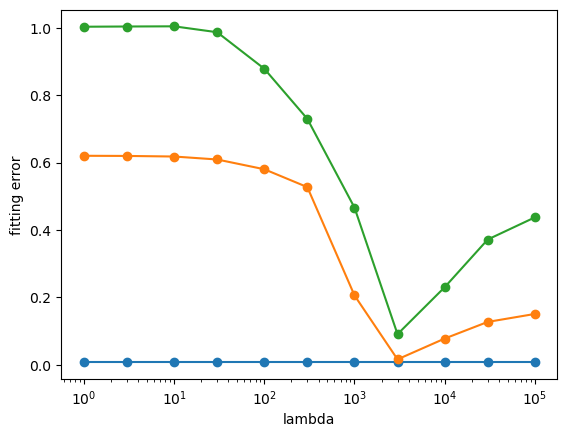

In [113]:
plt.figure()
plt.plot(theory_keys, fitness_scores[:, 0], marker='o')
plt.plot(theory_keys, fitness_scores[:, 10], marker='o')
plt.plot(theory_keys, fitness_scores[:, 19], marker='o')
plt.xlabel('lambda')
plt.xscale('log')
plt.ylabel('fitting error')

plt.figure()
plt.plot(theory_keys, fitness_scores[:, 0], marker='o')

In [98]:
all_theory_preds.keys()

dict_keys(['30.0', '1.0', '1000.0', '10000.0', '10.0', '100.0', '30000.0', '300.0', '100000.0', '3.0', '3000.0'])

dict_keys(['18.9', '38566.0', '20433.0', '10.0', '72789.0', '452.0', '853.0', '2212.0', '4175.0', '1172.0', '621.0', '28072.0', '52983.0', '174.0', '329.0', '14873.0', '7880.0', '48.9', '92.4', '67.2', '35.6', '3039.0', '1610.0', '13.7', '25.9', '100000.0', '10826.0', '5736.0', '127.0', '239.0'])


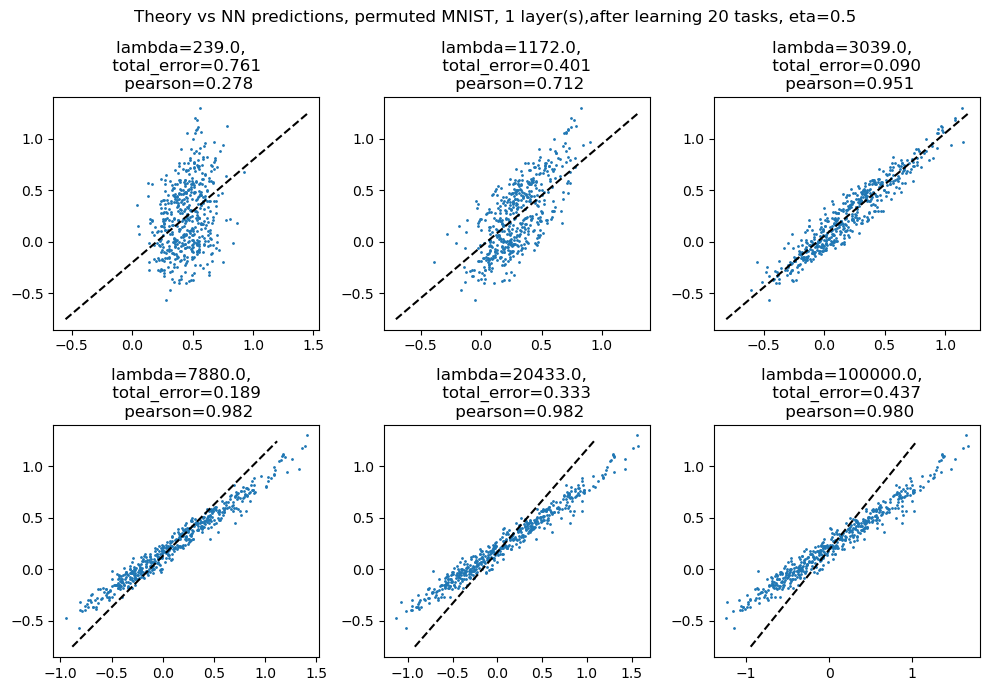

In [31]:
import scipy.stats
time = 19
theory_depth_key = '1'
print(all_theory_preds.keys())
lambda_keys = ['239.0', '1172.0', '3039.0', '7880.0', '20433.0', '100000.0']
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
axes = axes.ravel()

for i in range(len(lambda_keys)):
    data1 = all_theory_preds[lambda_keys[i]][0, time].flatten()
    data2 = all_sgd_preds.mean(0)[time].flatten()
    plt.sca(axes[i])
    plt.scatter(data1, data2, s=1)
    plt.plot([data1.mean()-1, data1.mean()+1], [data2.mean()-1, data2.mean()+1], 'k--')
    pearson_r = scipy.stats.pearsonr(data1.flatten(),
                                        data2.flatten())

    score = np.linalg.norm(data1 - data2)**2 / (np.linalg.norm(data1) * np.linalg.norm(data2))
    plt.title(f'lambda={lambda_keys[i]},  \n total_error={score:.3f} \n pearson={pearson_r.statistic:.3f}')

plt.suptitle(f'Theory vs NN predictions, permuted MNIST, {theory_depth_key} layer(s),' + 
               f'after learning {time+1} tasks, eta={sgd_organizer.args.eta}')
plt.tight_layout()

In [75]:
data2.shape

(500,)

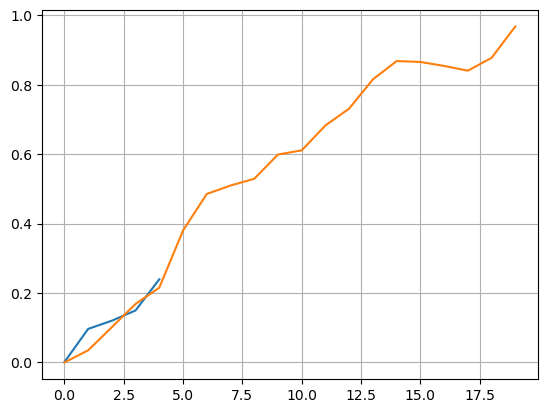

In [32]:
plt.figure()
plt.plot(all_train_loss['3'].mean(0)[0])
training_loss_theory = theory_organizer.organize_results('train loss')['1000.0'][0]
plt.plot(training_loss_theory[0])
plt.grid()

In [8]:
import os
os.chdir('/Users/haozheshan/Dropbox/codes/gp_continual_learning/')

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize, theory, cluster_utils, torch, data, utils
import torch.nn.functional as func
%load_ext autoreload
%autoreload 2

local_path = '/Users/haozheshan/Dropbox/codes/gp_continual_learning/cluster_results'

# ==================================================

sgd_batch_name = 'gradient_5x500_mnist_permuted_1L_N5000_seed0_MINI1_eta1'
sgd_sort_by_key = 'permutation'
sgd_key = '1.0'

theory_batch_name = 'gp_10x500_mnist_permuted_1L_diff_lambda'
theory_sort_by_key = 'lambda_val'
theory_key = '30000.0'
theory_seed = 0  # this controls the random seed used to generate the datasets

# ==================================================



args = organizer.args

title_text = f'{organizer.args.dataset}, P={organizer.args.P},' +\
          f'\n {organizer.args.n_tasks} tasks,' \
          f' permutation:{bool(organizer.args.permutation)},' \
          f'Depth:{organizer.args.depth}, N:{organizer.args.N}'

print(args)



test_acc_theory_naive = theory_organizer.organize_results('test acc naive')[theory_key][theory_seed][:, :args.n_tasks]
training_acc_theory_naive = theory_organizer.organize_results('train acc naive')[theory_key][theory_seed][:, :args.n_tasks]
test_loss_theory_naive = theory_organizer.organize_results('test loss naive')[theory_key][theory_seed][:, :args.n_tasks]
training_loss_theory_naive = theory_organizer.organize_results('train loss naive')[theory_key][theory_seed][:, :args.n_tasks]

sampled_outputs = theory_organizer.organize_results('sampled outputs')[theory_key][theory_seed][:args.n_tasks]
sampled_outputs_naive = theory_organizer.organize_results('sampled outputs naive')[theory_key][theory_seed][:args.n_tasks]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
=================== Cluster organizer ===================
50 data objects loaded from folder "gradient_5x500_mnist_permuted_1L_N5000_seed0_MINI1_eta1".
For key <<permutation>>, the values are [1.0]
=================== Cluster organizer ===================
Namespace(f=None, cluster=1, BATCH_NAME='gradient_5x500_mnist_permuted_1L_N5000_seed0_MINI1_eta1', TRIAL_IND=49, P=500, P_test=500, N=5000, n_tasks=5, eta=1.0, T=0.0, sigma=1.0, depth=1, seed=50, l2=0.0, decay=0.0, dataset='mnist', task_type='permuted', permutation=1.0, n_epochs=1, n_steps=500000)
=================== Cluster organizer ===================
100 data objects loaded from folder "gp_10x500_mnist_permuted_1L_diff_lambda".
For key <<lambda_val>>, the values are [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0]
=================== Cluster organizer ===================


In [ ]:
all

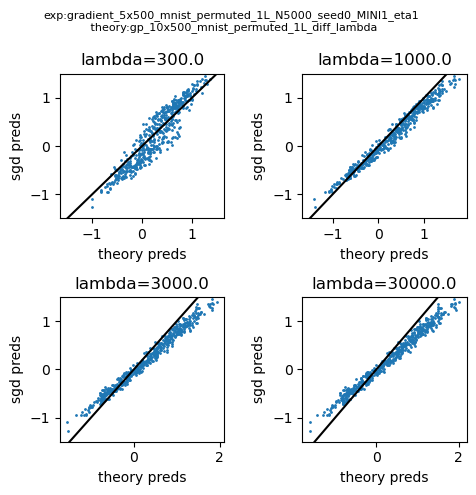

In [9]:
theory_keys = ['300.0', '1000.0', '3000.0', '30000.0']

_, axes = plt.subplots(2, 2, figsize=(5, 5))
axes = axes.ravel()

task_time_ind = -1

for i, _key in enumerate(theory_keys):
    plt.sca(axes[i])


    theory_preds = theory_organizer.organize_results('sampled outputs')[_key][theory_seed][:args.n_tasks]
    plt.scatter(theory_preds[task_time_ind],
                all_nn_preds[sgd_key].mean(0)[task_time_ind], s=1)
    plt.xlabel('theory preds')
    plt.ylabel('sgd preds')
    plt.plot([-1.5, 1.5], [-1.5, 1.5], color='k')
    plt.ylim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.title(f'lambda={_key}')
plt.suptitle('exp:' + sgd_batch_name + '\n theory:' + theory_batch_name, fontsize=8)
plt.tight_layout()

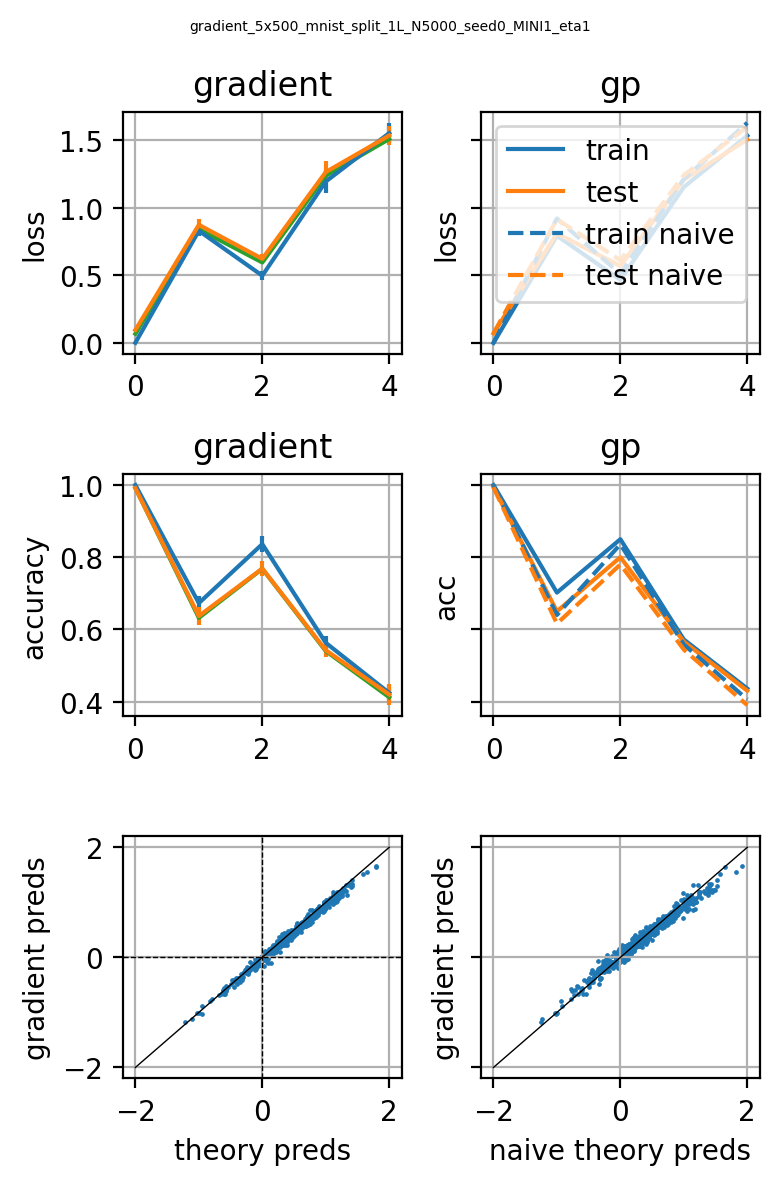

In [26]:
%matplotlib inline
torch.manual_seed(0)
THEORY_SIGMA_SQ = args.sigma**2
THEORY_LAMBDA = 1e5
THEORY_P = args.P
if args.task_type == 'permuted':
    seq_of_train_x, seq_of_test_x, seq_of_train_y, seq_of_test_y = \
        data.prepare_permuted_dataset(args.n_tasks, THEORY_P, args.P_test, dataset_name=args.dataset,
                                        resample=False,
                                        permutation=args.permutation, data_path=None, precision=64)
elif args.task_type == 'split':
    seq_of_train_x, seq_of_test_x, seq_of_train_y, seq_of_test_y = \
        data.prepare_split_dataset(args.P, args.P_test, dataset_name=args.dataset, data_path=None, precision=64)
else:
    raise ValueError('task type not understood')

loss_from_mean_nn_preds = []
for i in range(args.n_tasks):
    loss_from_mean_nn_preds.append(np.mean((all_nn_preds['1.0'].mean(0)[i].flatten() -
                                          seq_of_test_y[0].flatten().numpy())**2))

_, axes = plt.subplots(ncols=2, nrows=3, figsize=(4, 6), sharey='row', dpi=200)
axes = axes.ravel()



plt.sca(axes[0])
plt.errorbar(range(args.n_tasks), all_train_loss['1.0'].mean(0)[0],
             all_train_loss['1.0'].std(0)[0], label='train')
plt.errorbar(range(args.n_tasks), all_test_loss['1.0'].mean(0)[0],
             all_test_loss['1.0'].std(0)[0], label='test')
plt.plot(range(args.n_tasks), loss_from_mean_nn_preds, label='mean nn test')
plt.ylabel('loss')
plt.title('gradient')
plt.grid()

plt.sca(axes[1])
plt.plot(range(args.n_tasks), training_loss_theory[0], label='train')
plt.plot(range(args.n_tasks), test_loss_theory[0], label='test')
plt.plot(range(args.n_tasks), training_loss_theory_naive[0], label='train naive', ls='--', color='C0')
plt.plot(range(args.n_tasks), test_loss_theory_naive[0], label='test naive', ls='--', color='C1')
plt.ylabel('loss')
plt.title('gp')
plt.grid()
plt.legend()
#
# compute test acc from the mean NN prediction
acc_from_mean_nn_preds = []
for i in range(args.n_tasks):
    acc_from_mean_nn_preds.append(np.mean(all_nn_preds['1.0'].mean(0)[i].flatten() *
                                          seq_of_test_y[0].flatten().numpy() > 0))

plt.sca(axes[2])
plt.errorbar(range(args.n_tasks), all_train_acc['1.0'].mean(0)[0],
             all_train_acc['1.0'].std(0)[0])
plt.errorbar(range(args.n_tasks), all_test_acc['1.0'].mean(0)[0],
             all_test_acc['1.0'].std(0)[0])
plt.grid()
plt.plot(range(args.n_tasks), acc_from_mean_nn_preds, label='mean nn test')
plt.ylabel('accuracy')
plt.title('gradient')


plt.sca(axes[3])
plt.plot(range(args.n_tasks), training_acc_theory[0], label='train')
plt.plot(range(args.n_tasks), test_acc_theory[0], label='test')
plt.plot(range(args.n_tasks), training_acc_theory_naive[0], label='train', ls='--', color='C0')
plt.plot(range(args.n_tasks), test_acc_theory_naive[0], label='test', ls='--', color='C1')
plt.ylabel('acc')
plt.title('gp')
plt.grid()

plt.sca(axes[4])
task_time_ind = -1
plt.scatter(sampled_outputs[task_time_ind],
            all_nn_preds['1.0'].mean(0)[task_time_ind], s=.5, alpha=1)
plt.axhline(0, color='k', ls='--', lw=0.5)
plt.axvline(0, color='k', ls='--', lw=0.5)
plt.plot([-2, 2], [-2, 2], color='k', lw=0.5)
plt.xlabel('theory preds')
plt.ylabel('gradient preds')
plt.grid()

plt.sca(axes[5])
plt.scatter(sampled_outputs_naive[task_time_ind],
            all_nn_preds['1.0'].mean(0)[task_time_ind], s=.5, alpha=1)
plt.plot([-2, 2], [-2, 2], color='k', lw=0.5)
plt.xlabel('naive theory preds')
plt.ylabel('gradient preds')
plt.grid()

plt.suptitle(sgd_batch_name, fontsize=5)
plt.tight_layout()

# Does the full GP theory fit NN results better than naive GP?

IndexError: index 5 is out of bounds for axis 0 with size 5

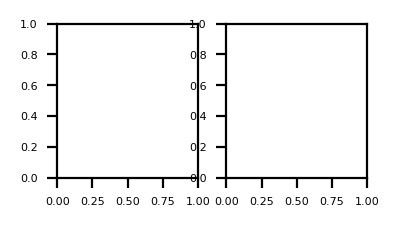

In [26]:
TIME_IND = 5
_, axes = plt.subplots(ncols=2, nrows=1, figsize=(2, 1))
axes = axes.ravel()

plt.sca(axes[0])
plt.scatter(sampled_outputs[TIME_IND], all_nn_preds['1.0'].mean(0)[TIME_IND], s=1)
plt.xlabel('full gp')
plt.axhline(0, color='k', ls='--')
plt.plot([-1.5, 1.5], [-1.5, 1.5], color='k', ls='--')
plt.axvline(0, color='k', ls='--')
plt.ylabel('nn')

plt.sca(axes[1])
plt.scatter(sampled_outputs_naive[TIME_IND], all_nn_preds['1.0'].mean(0)[TIME_IND], s=1)
plt.xlabel('naive gp')
plt.axhline(0, color='k', ls='--')
plt.plot([-1.5, 1.5], [-1.5, 1.5], color='k', ls='--')
plt.axvline(0, color='k', ls='--')
plt.ylabel('nn')

plt.tight_layout()

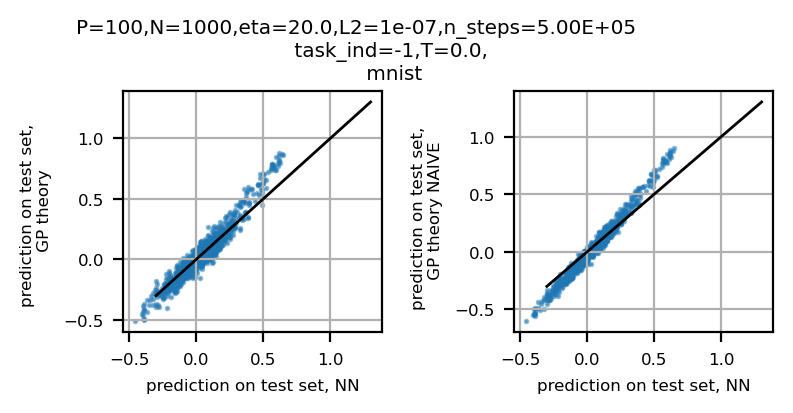

In [14]:
TIME_IND = -1
assert TIME_IND <= args.n_tasks - 1
key = '1e-07'

# plot predictions from head#0 of the NN and that from the theory, on the first test set
fig, axes = plt.subplots(figsize=(4, 2), ncols=2, nrows=1, dpi=200)
axes = axes.ravel()
plt.sca(axes[0])
plt.scatter(all_nn_preds[key].mean(0)[TIME_IND].mean(0),
            theory_test_preds[0, TIME_IND].flatten(), s=1, alpha=0.5)
plt.plot([-0.3, 1.3], [-0.3, 1.3], color='k')
plt.grid()
plt.ylabel('prediction on test set, \n GP theory')
plt.xlabel('prediction on test set, NN')

plt.sca(axes[1])
plt.scatter(all_nn_preds[key].mean(0)[TIME_IND].mean(0),
            theory_test_preds_naive[0, TIME_IND].flatten(), s=1, alpha=0.5)
plt.plot([-0.3, 1.3], [-0.3, 1.3], color='k')
plt.grid()
plt.ylabel('prediction on test set,  \n GP theory NAIVE')
plt.xlabel('prediction on test set, NN')
plt.suptitle(f'P={args.P},N={args.N},eta={args.eta},L2={args.l2},n_steps={args.n_steps:.2E} \
          \n task_ind={TIME_IND},T={args.T}, \n {args.dataset}')
plt.tight_layout()
plt.subplots_adjust(top=0.8)

Text(0, 0.5, 'test loss')

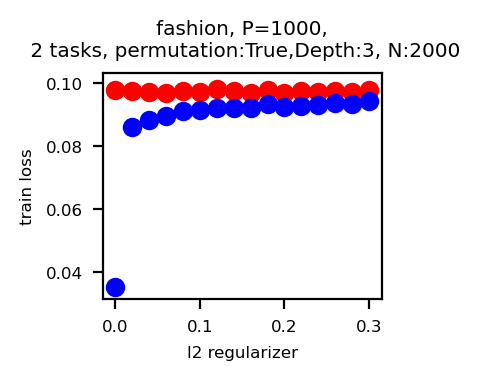

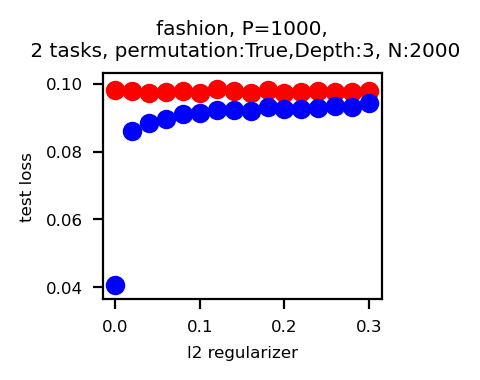

In [33]:
def plot_loss_over_lambda(all_xxx_loss):

    plt.figure()
    for key in all_test_acc.keys():
        plt.errorbar(float(key), all_xxx_loss[key].mean(0)[0, 1],
                     all_xxx_loss[key].std(0)[0, 1], color='r', marker='o')
        plt.errorbar(float(key), all_xxx_loss[key].mean(0)[1, 1],
                     all_xxx_loss[key].std(0)[1, 1], color='b', marker='o')
    plt.xlabel('l2 regularizer')
    plt.title(title_text)


plot_loss_over_lambda(all_train_loss); plt.ylabel('train loss')

plot_loss_over_lambda(all_test_loss); plt.ylabel('test loss')

Text(0.5, 1.0, 'train loss \nfashion, P=1000,\n 2 tasks, permutation:True,Depth:3, N:2000')

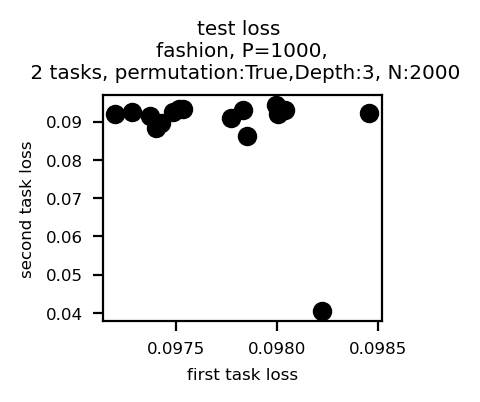

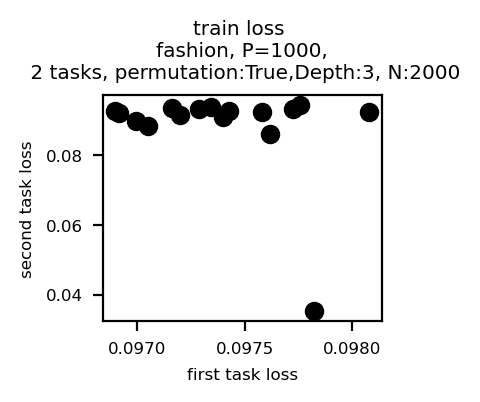

In [34]:
def plot_loss_on_2d(all_xxx_loss):

    plt.figure()
    for key in all_test_acc.keys():
        plt.scatter(all_xxx_loss[key].mean(0)[0, 1], all_xxx_loss[key].mean(0)[1, 1],
                     color='k', marker='o')
    plt.xlabel('first task loss')
    plt.ylabel('second task loss')

plot_loss_on_2d(all_test_loss)
plt.title('test loss \n' + title_text)

plot_loss_on_2d(all_train_loss)
plt.title('train loss \n' + title_text)
